# Import Libary

In [ ]:
! pip install easyocr

     |████████████████████████████████| 63.2 MB 23 kB/s 


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import easyocr

## Read Image

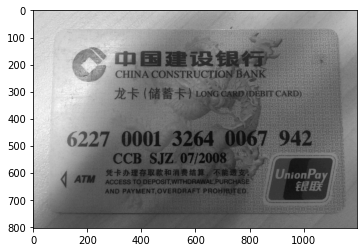

In [ ]:
img = cv2.imread('5.jpg',0)
plt.imshow(img, cmap='gray')

## Thresholding Menggunakan OpenCV

Disini, kami mencoba 3 metode, yang pertama itu threshold dengan binary seperti biasa, lalu binary yang menggunakan otsu, selanjutnya tozero inv dan yang terakhir menggunakan tozero dan otsu namun imagenya di negative terlebih dahulu

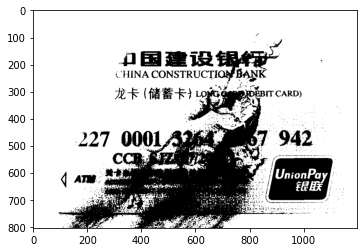

In [ ]:
ret, binary_threshold = cv2.threshold(img,95,255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(binary_threshold, cv2.COLOR_BGR2RGB))

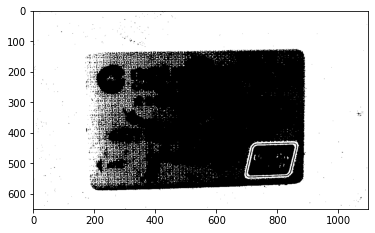

In [ ]:
ret, otsu_threshold = cv2.threshold(img,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(otsu_threshold, cv2.COLOR_BGR2RGB))

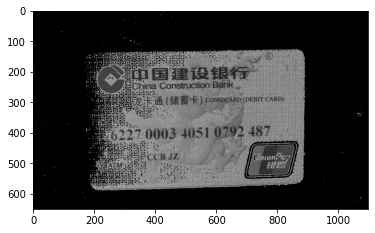

In [ ]:
ret2, otsu_threshold2 = cv2.threshold(img,0,255, cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(otsu_threshold2, cv2.COLOR_BGR2RGB))

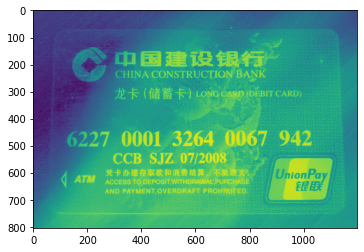

In [ ]:
negative = cv2.bitwise_not(img)
plt.imshow(negative)

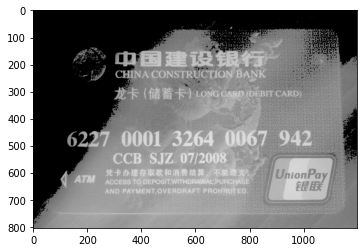

In [ ]:
ret3, otsu_threshold3 = cv2.threshold(negative,0,255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(otsu_threshold3, cv2.COLOR_BGR2RGB))

# Proses Binary Thresholding

## Crop Gambar

Untuk mempermudah menentukan dikoordinat mana, gambar akan dipotong, maka kami menggunakan bantuan grid dengan cv2.line

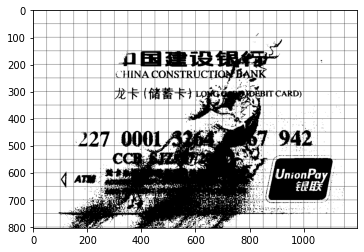

In [ ]:
# cv2.line(image, start_point, end_point, color, thickness)

grid_size = 50
height, width = img.shape

for x in range(0, width, grid_size):
    cv2.line(binary_threshold, (x, 0), (x, height), (0, 0, 0), 1)
        
for y in range(0, height, grid_size):
    cv2.line(binary_threshold, (0, y), (width, y), (0, 0, 0), 1)
    
plt.imshow(cv2.cvtColor(binary_threshold, cv2.COLOR_BGR2RGB))

setelah grid dibuat, maka kita lakukan crop

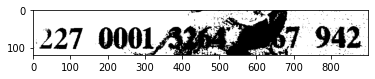

In [ ]:
ret, binary_threshold = cv2.threshold(img,95,255, cv2.THRESH_BINARY)
# image[startY:endY, startX:endX]
crop_img = binary_threshold[400:520,150:1050]
#crop_img2 = binary_threshold[450:600,200:1100]
#crop_img3 = binary_threshold[500:650,200:1100]
#crop_img4 = binary_threshold[400:550,100:1100]

plt.imshow(crop_img, cmap='gray')

## Erosi dan Dilasi

Kami menggunakan erosi dan dilasi, untuk menghilangkan noise namun tetap membuat tulisan tetap terbaca (jangan sampai ketika di dilasi, tulisannya jadi ikut hilang), maka kami melakukan dilasi dan erosi, namun kami melakukan dilasi lagi agar noisenya hilang

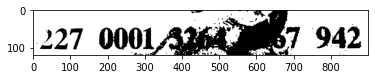

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

se=cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
se2=cv2.getStructuringElement(cv2.MORPH_RECT , (3,3))

dilasi = cv2.morphologyEx(crop_img, cv2.MORPH_DILATE, se)
erosi = cv2.morphologyEx(dilasi, cv2.MORPH_ERODE, se2)
dilasi2 = cv2.morphologyEx(erosi, cv2.MORPH_DILATE, se)

plt.imshow(cv2.cvtColor(dilasi2, cv2.COLOR_BGR2RGB))

## Image to Text

Kami mencoba membaca angka dari gambar yang sudah di erosi dan dilasi menggunakan easyocr

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(dilasi2)
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[14, 39], [139, 39], [139, 113], [14, 113]], '227', 0.5844256281852722), ([[168, 38], [334, 38], [334, 116], [168, 116]], '0001', 0.7036269307136536), ([[679, 51], [717, 51], [717, 107], [679, 107]], 'H', 0.2604515141001684), ([[749, 29], [893, 29], [893, 117], [749, 117]], '942', 0.9432119727134705)]


## Component Labeling

Sebelum melabeli gambar, kita harus membuat gambarnya menjadi negative terlebih dahulu

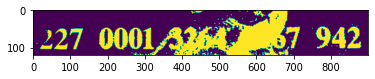

In [ ]:
image_negative = cv2.bitwise_not(dilasi2)
plt.imshow(image_negative)

Setelah dibuat negative image, kita membuat component labellingnya

In [ ]:
total_components, labels = cv2.connectedComponents(image_negative)

# Mappinng component pada gambar dengan Hue, 0-179 adalah nilai range hue OpenCV
label_hue = np.uint8(179 * labels/np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Convert ke RGB
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# Mengubah background menjadi warna hitam
labeled_img[label_hue==0] = 0

Sebelum dilabeling


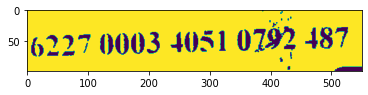

In [ ]:
print('Sebelum dilabeling')
plt.imshow(dilasi2)

Sesudah dilabeling


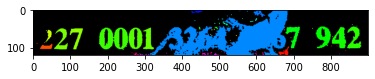

In [ ]:
print('Sesudah dilabeling')
plt.imshow(labeled_img)

In [ ]:
print('jumlah label component: ' ,total_components)

jumlah label component:  60


# Proses Tozero Thresholding

## Crop Gambar

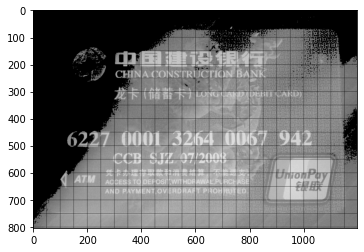

In [ ]:
# cv2.line(image, start_point, end_point, color, thickness)

grid_size = 50
height, width = img.shape

for x in range(0, width, grid_size):
    cv2.line(otsu_threshold3, (x, 0), (x, height), (0, 0, 0), 1)
        
for y in range(0, height, grid_size):
    cv2.line(otsu_threshold3, (0, y), (width, y), (0, 0, 0), 1)
    
plt.imshow(cv2.cvtColor(otsu_threshold3, cv2.COLOR_BGR2RGB))

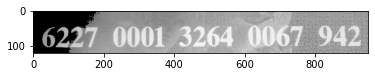

In [ ]:
ret3, otsu_threshold3 = cv2.threshold(negative,0,255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
# image[startY:endY, startX:endX]
crop_img_tozero = otsu_threshold3[400:520,100:1050]
#crop_img = binary_threshold[400:520,150:1050]
#crop_img2 = binary_threshold[450:600,200:1100]
#crop_img3 = binary_threshold[500:650,200:1100]
#crop_img4 = binary_threshold[400:550,100:1100]

plt.imshow(crop_img_tozero, cmap='gray')

## Dilasi Erosi

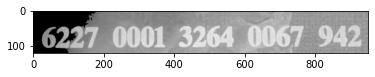

In [ ]:
se3=cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
se4=cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))

dilasi_tozero = cv2.morphologyEx(crop_img_tozero, cv2.MORPH_DILATE, se3)
erosi_tozero = cv2.morphologyEx(dilasi_tozero, cv2.MORPH_ERODE, se4)
dilasi_tozero2 = cv2.morphologyEx(erosi_tozero, cv2.MORPH_DILATE, se3)

plt.imshow(cv2.cvtColor(dilasi_tozero2, cv2.COLOR_BGR2RGB))

## Image to Text

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(dilasi_tozero2)
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[18, 38], [194, 38], [194, 118], [18, 118]], '6227', 0.999999463558197), ([[219, 33], [775, 33], [775, 117], [219, 117]], '0001 3264 0067', 0.3877718717322306), ([[800, 34], [942, 34], [942, 114], [800, 114]], '942', 0.9165253043174744)]


## Component Labeling

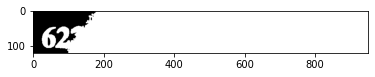

In [ ]:
ret, binary_comp_labelling = cv2.threshold(dilasi_tozero2,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(cv2.cvtColor(binary_comp_labelling, cv2.COLOR_BGR2RGB))

In [ ]:
total_components_tozero, labels = cv2.connectedComponents(binary_comp_labelling)

# Mappinng component pada gambar dengan Hue, 0-179 adalah nilai range hue OpenCV
label_hue = np.uint8(179 * labels/np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Convert ke RGB
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# Mengubah background menjadi warna hitam
labeled_img[label_hue==0] = 0

Sebelum dilabeling


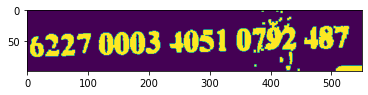

In [ ]:
print('Sebelum dilabeling')
plt.imshow(binary_comp_labelling)

Sesudah dilabeling


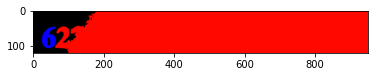

In [ ]:
print('Sesudah dilabeling')
plt.imshow(labeled_img)

In [ ]:
print('jumlah label component: ' ,total_components_tozero)

jumlah label component:  31
